In [1]:
%store -r __imp

In [2]:
__imp

The libraries have been loaded!


In [3]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import wordcloud

In [4]:
df_m = pd.read_csv('texto_pregacoes.csv')

#df_m = df_m[df_m.pregador == 'martinez']

df_m = df_m[df_m.confianca > 0.82]

df_m['fala'] = df_m['fala'].apply(str.lower)

In [5]:
tokenizer = TreebankWordTokenizer()

stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['tá','lá','tô','aí','alguma','rua','munhoz','menezes','burro','pantera','zona','ainda','assim','é','antes','porque','pois'])
palavras  = []
for frase in df_m.fala.values:
    palavras.extend([p for p in tokenizer.tokenize(frase.strip()) if p not in stopwords and p not in punctuation])

palavras[:5]    

['livro', 'números', 'parte', 'fala', 'moisés']

In [9]:
len(df_m.arq_ogm.unique())

22

(-0.5, 1279.5, 928.5, -0.5)

<Figure size 432x288 with 0 Axes>

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


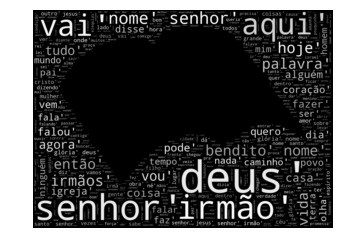

<Figure size 432x288 with 0 Axes>

In [8]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)



# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join('C:\\Work', "1280px-Open_bible_01_01.png")))

# adding movie script specific stopwords
stopwords = set(stopwords)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, margin=10,
               random_state=1).generate(str(palavras))
# store default colored image
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("wordcloud_pregacoes.png")
plt.axis("off")
plt.figure()


In [63]:
[p for p in palavras if 'jesus' in p]

['jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',
 'jesus',


## Cria um grafo cujos nós são as palavras e as arestas são o número de vezes que a palavra aparece até um verso de distância no mesmo capitulo

In [52]:
len(df_m.arq_ogm.unique())

8

In [ ]:

nos = list(set(c.index))
arestas = []


In [ ]:
for l in livros_pesquisa:
    livro = df_b[df_b.livro == l]
    for i in livro.capitulo.unique():
        capitulo = livro[livro.capitulo == i]
        capitulo['verso_anterior'] = capitulo['palavras'].shift(1).fillna('')
        for i,verso in capitulo.iterrows():
            for p in verso['palavras']:
                for p2 in verso['palavras'] :
                    if p2 != p and p2 in nos and p in nos:
                        arestas.append((nos.index(p),nos.index(p2)))
                #proximo verso
                for p2 in verso['verso_anterior']:
                        if p2 in nos and p in nos:
                            arestas.append((nos.index(p),nos.index(p2)))


In [ ]:
g = Graph(len(nos),list(set(arestas)))

In [ ]:
g.es['peso'] = [arestas.count(a) for a in g.es]

In [ ]:
pd.DataFrame(g.es['peso']).describe()

In [ ]:
g.vs['palavras'] = nos

In [ ]:
g.vs.find(palavras='deus')

In [ ]:
len(arestas)

In [ ]:
len(nos)

In [ ]:
layout = g.layout_kamada_kawai()

In [ ]:
%matplotlib inline
plot(g, layout = layout, bbox = (300, 300), margin = 20)

In [ ]:
df_a = pd.DataFrame(arestas,columns=['a1','a2'])

In [ ]:
df_a['p1'] = df_a.a1.apply(lambda x: nos[x])
df_a['p2'] = df_a.a2.apply(lambda x: nos[x])

In [ ]:
df_a.head()

In [ ]:
df_a.groupby(['p1','p2']).count().sort_values('a1',ascending=False)